# Machine Learning

In [481]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import seaborn as sn
import numpy as np

In [482]:
dataset = pd.read_csv(Path('./Resources/culture_year_gdp.csv'))
dataset.head()


,Years,Domain,GDP
0,2010,Audio-Visual and Interactive Media,364299490
1,2011,Audio-Visual and Interactive Media,431327770
2,2012,Audio-Visual and Interactive Media,446032959
3,2013,Audio-Visual and Interactive Media,365077042
4,2014,Audio-Visual and Interactive Media,398413739


In [483]:
dataset = dataset.loc[dataset.Domain =='Visual and Applied Arts']
dataset = dataset.drop(['Domain'],axis=1)
dataset=dataset.reset_index(drop=True)
dataset

,Years,GDP
0,2010,191075690
1,2011,209865471
2,2012,220195777
3,2013,196319109
4,2014,226864311
5,2015,236971117
6,2016,248549071
7,2017,253674752
8,2018,264583039
9,2019,270956248


In [484]:
dataset.shape

(10, 2)

In [485]:
dataset.describe()

,Years,GDP
count,10.00000,1.000000e+01
mean,2014.50000,2.319055e+08
std,3.02765,2.779111e+07
min,2010.00000,1.910757e+08
25%,2012.25000,2.124480e+08
50%,2014.50000,2.319177e+08
75%,2016.75000,2.523933e+08
max,2019.00000,2.709562e+08


### Supervised Linear Regression

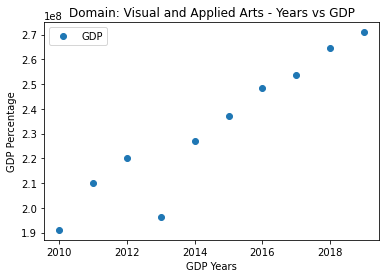

In [486]:
# plot data points on 2-D graph to see dataset and if we can find any relationship between the data. 
# The target variable is GDP, meaning that the goal of the linear regression model
# is to predict GDP based on years of past GDP
dataset.plot(x='Years', y='GDP', style='o')
plt.title('Domain: Visual and Applied Arts - Years vs GDP')
plt.xlabel('GDP Years')
plt.ylabel('GDP Percentage')
plt.show()


In [487]:
# Prepare data 
# divide the data into "attributes" and "labels"
# Attributes are the independent variables, labels are dependent variables 
# whose values are to be predicted.
# all the columns except the last one, which is in this case column 0, years
X = dataset.iloc[:, :-1].values #this gives attribue: the years
y = dataset.iloc[:, 1].values # this will be the labels -> gdp to be predicted


In [488]:
# splits 80% of the data to training set while 20% of the data to test set. 
# The test_size variable specify the proportion of test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_test

array([220195777, 264583039], dtype=int64)

In [489]:
# Train the algorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [490]:
# Create and train the model
model = LinearRegression().fit(X_train, y_train)
# Generate predictions
y_pred = model.predict(X_test)

In [491]:
#  Score Data
# If the value of the r squared score is 1, it means that the model is perfect and if its value is 0,
# it means that the model will perform badly on an unseen dataset

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

# Rows of data 10 rows of 
# Repost: Training set 89% accuracy 
# Testing Score 84% 
# Given the linear regression model the machine is predicting at an accuracy of 84% 
# Mean square error is extrememly high and my accuracy are above 80% 
# My model overfitting my data set meaning that the computer or machine is memorizing the trend and not actually learning


Training Score: 0.8994089459737954
Testing Score: 0.8413684765306174
---------------------
R2 Score: 0.8413684765306174


In [492]:
# To retrieve the intercept:
print("intercept: ", regressor.intercept_/1000000)

# For retrieving the slope (coefficient of x):
print("slope: ", regressor.coef_/1000000)

# y = gdp
# x = year

# y = 8.9x -17803.21

# gdp = 8.9 * year - 17803.21


intercept:  -17803.213192
slope:  [8.951907]


In [493]:
# making predictions
y_pred = regressor.predict(X_test)
y_pred #contains all the predicted values for the input values in the X_test series.

array([2.08023692e+08, 2.61735134e+08])

In [494]:
# To compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'GDP Actual': y_test/10000000, 'GDP Predicted': y_pred/10000000})
df
# the predicted percentages are close to the actual ones.

,GDP Actual,GDP Predicted
0,22.019578,20.802369
1,26.458304,26.173513


In [495]:
# evaluate the performance of algorithm
# for regression algorithms, do the three evaluation metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)/1000000)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)/1000000)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/1000000)


Mean Absolute Error: 7.509995
Mean Squared Error: 78135108.068125
Root Mean Squared Error: 8.839406545019015


In [496]:
# find the mean of the dataset to compare to the mean squared error
dataset.mean()/1000000

Years      0.002014
GDP      231.905459
dtype: float64

In [497]:
# the value of root mean squared error is 8.83, which is less than 4% of the mean 
# value of the percentages of all the GDP's 231.9. This means that the algorithm did a decent job
root_mean_squared_error = 8.83
mean_of_gdp = 231.9
percentage_of_mean_squared_error =  root_mean_squared_error* 100 / mean_of_gdp
percentage_of_mean_squared_error

3.8076757222940922

In [499]:
cm = pd.crosstab(df["GDP Actual"], df["GDP Predicted"], rownames=["Actual"])
# sn.heatmap(cm, annot=True)
# plt.show()

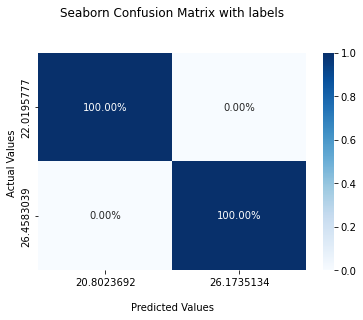

In [500]:
ax = sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

# save the model to disk

In [466]:
import pickle
filename = 'culture_regression_model.sav'
pickle.dump(model, open(filename, 'wb'))
# scaler
filename = 'culture_regression_model_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

# load the model from disk if we want to use it,load and loaded_model functions
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

## RANDOM FOREST

In [467]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [468]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [469]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(random_state=78) 

In [470]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
rf_model

RandomForestClassifier(random_state=78)

In [471]:
#  Score Data
training_score = rf_model.score(X_train, y_train)
testing_score = rf_model.score(X_test, y_test)
# score = r2_score(y_test, y_pred)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
# print(f"R2 Score: {score}")

# underfitting 
# doing well on the training set but 
# testing data for r2 score performs extremely bad a 0% accuracy 

Training Score: 1.0
Testing Score: 0.0
---------------------


In [472]:
y_test

array([270956248, 191075690, 226864311], dtype=int64)

In [473]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([209865471, 209865471, 209865471], dtype=int64)

## random forest prediction-ytest values are off so much-doesn't work

In [474]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)
cm

array([[0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]], dtype=int64)

In [475]:
# Create a DataFrame from the confusion matrix.
# cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# cm_df

In [476]:
# Calculating the accuracy score.
# gives zero accuracy score - can't use random forest
acc_score = accuracy_score(y_test, predictions)
acc_score

0.0

### ytest, prediction graph  showing actual and prediction plot 

In [477]:
dfp = pd.DataFrame({ "actual": y_test, "predictions": predictions })
cm = pd.crosstab(dfp["actual"], dfp["predictions"], rownames=["Actual"])
# sn.heatmap(cm, annot=True)
# plt.show()

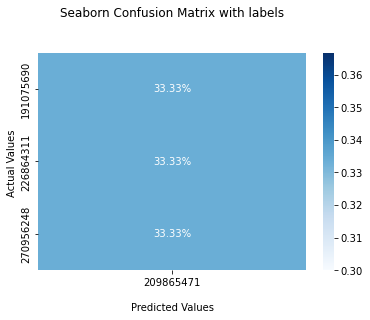

In [478]:
ax = sn.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()